In [1]:
import pandas as pd
import pm4py

In [2]:
# pd.set_option('display.max_rows', 50)  # Set this to a higher number if needed
pd.set_option('display.max_columns', None)  # Show all columns

In [3]:
# Ładowanie CSV do pandas DataFrame
file_path = 'files/examples.csv'
df = pd.read_csv(file_path)
print(df)

     case_id                         timestamp  \
0         15  2024-10-10T21:49:13.466328+00:00   
1         15  2024-10-10T21:49:16.561865+00:00   
2         15  2024-10-10T21:49:16.590864+00:00   
3         15  2024-10-10T21:49:18.167995+00:00   
4         15  2024-10-10T21:49:18.169994+00:00   
..       ...                               ...   
175       17  2024-10-24T18:16:57.300353+00:00   
176       17  2024-10-24T18:16:57.351975+00:00   
177       17  2024-10-24T18:17:01.093242+00:00   
178       17  2024-10-24T18:17:01.135045+00:00   
179       17  2024-10-24T18:17:01.809818+00:00   

                        end_timestamp  cost          activity  \
0    2024-10-10T21:49:16.561865+00:00     0         __start__   
1    2024-10-10T21:49:16.590864+00:00     0        supervisor   
2    2024-10-10T21:49:18.167995+00:00     0         __start__   
3    2024-10-10T21:49:18.169994+00:00     0        supervisor   
4    2024-10-10T21:49:30.265491+00:00     0         __start__   
..       

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
event_log = pm4py.format_dataframe(df, case_id='case_id', activity_key='activity', timestamp_key='timestamp')

In [41]:
# TO DZIALA - PRZYJRZEC SIE DALEJ?
ocel = pm4py.convert_log_to_ocel(event_log)
log = pm4py.write_ocel2_sqlite(ocel, "/Users/tomek/Desktop/GIT/LangGraph-Parser-PoC/test.sqlite")

In [35]:
properties = pm4py.utils.get_properties(event_log)
print(properties)

{'pm4py:param:activity_key': 'concept:name', 'pm4py:param:timestamp_key': 'time:timestamp', 'pm4py:param:group_key': 'org:group', 'pm4py:param:transition_key': 'lifecycle:transition', 'pm4py:param:resource_key': 'org:resource', 'pm4py:param:case_id_key': 'case:concept:name', 'pm4py:param:attribute_key': 'concept:name'}


In [5]:
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print(start_activities)
print(end_activities)

{'__start__': 3}
{'supervisor': 3}


In [6]:
event_attributes = pm4py.get_event_attributes(event_log)
print(event_attributes)

['case_id', 'timestamp', 'end_timestamp', 'cost', 'activity', 'org:resource', 'case:concept:name', 'concept:name', 'time:timestamp', '@@index', '@@case_index']


In [7]:
trace_attributes = pm4py.get_trace_attributes(event_log)
print(trace_attributes)

['case:concept:name']


In [8]:
activities = pm4py.get_event_attribute_values(event_log, 'concept:name')
print(activities)

{'supervisor': 65, '__start__': 43, 'agent': 25, 'PaperWritingTeam': 16, 'DocWriter': 8, 'tools': 7, 'ResearchTeam': 6, 'Search': 3, 'WebScraper': 3, 'ChartGenerator': 2, 'NoteTaker': 2}


In [9]:
trace_activities = pm4py.get_trace_attribute_values(event_log, 'concept:name')
print(trace_activities)

{'supervisor': 65, '__start__': 43, 'agent': 25, 'PaperWritingTeam': 16, 'DocWriter': 8, 'tools': 7, 'ResearchTeam': 6, 'Search': 3, 'WebScraper': 3, 'ChartGenerator': 2, 'NoteTaker': 2}


In [10]:
variants = pm4py.get_variants(event_log)
for variant, count in variants.items():
    print(f"Variant: {variant}")
    print(f"Count: {count}")
    print("-" * 50)
print(len(variants))

Variant: ('__start__', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'Search', 'supervisor', '__start__', 'agent', 'WebScraper', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor')
Count: 1
--------------------------------------------------
Variant: ('__start__', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'Search', 'supervisor', '__start__', 'agent', 'WebScraper', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'DocWriter', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'NoteTaker', 'supervisor', 'PaperWritingTeam',

In [11]:
for variant, subdf in pm4py.split_by_process_variant(event_log):
    print(f"Wariant: {variant}")
    print()
    # sub dataframe jak chcemy zobaczyc wszystko - tylko po co?
    print(subdf)

Wariant: ('__start__', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'Search', 'supervisor', '__start__', 'agent', 'WebScraper', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor')

    case_id                        timestamp                    end_timestamp  \
0        15 2024-10-10 21:49:13.466328+00:00 2024-10-10 21:49:16.561865+00:00   
1        15 2024-10-10 21:49:16.561865+00:00 2024-10-10 21:49:16.590864+00:00   
2        15 2024-10-10 21:49:16.590864+00:00 2024-10-10 21:49:18.167995+00:00   
3        15 2024-10-10 21:49:18.167995+00:00 2024-10-10 21:49:18.169994+00:00   
4        15 2024-10-10 2

In [12]:
var_path_durs = pm4py.get_variants_paths_duration(event_log)
print(var_path_durs)

    @@index_in_trace  @@flow_time  @@cumulative_occ_path_column  concept:name  \
0                  0     0.850753                             0     __start__   
1                  1     0.001970                             0    supervisor   
2                  2     1.041899                             1     __start__   
3                  3     0.002000                             1    supervisor   
4                  4     9.873727                             0     __start__   
..               ...          ...                           ...           ...   
36                36     0.835591                             1  ResearchTeam   
37                37     0.045999                             8    supervisor   
38                38     0.393038                             5     __start__   
39                39     0.041511                             2    supervisor   
40                40     0.970577                             2  ResearchTeam   

   concept:name_2          

In [13]:
# var_path_durs.to_csv('variants_paths_duration.csv', index=False)

In [14]:
language = pm4py.get_stochastic_language(event_log)
print(language)

{('__start__', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'Search', 'supervisor', '__start__', 'agent', 'WebScraper', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'ChartGenerator', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', 'ResearchTeam', 'supervisor'): 0.3333333333333333, ('__start__', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'Search', 'supervisor', '__start__', 'agent', 'WebScraper', 'supervisor', 'ResearchTeam', 'supervisor', '__start__', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'DocWriter', 'supervisor', '__start__', 'agent', 'tools', 'agent', 'NoteTaker', 'supervisor', 'PaperWritingTeam', 'supervisor', '__start__', 'supervisor', '__start__', '

In [15]:
msd = pm4py.get_minimum_self_distances(event_log)
print(msd)

{'ChartGenerator': 5, 'DocWriter': 3, 'PaperWritingTeam': 3, 'ResearchTeam': 3, '__start__': 1, 'agent': 1, 'supervisor': 1, 'tools': 5}


In [16]:
msd_wit = pm4py.get_minimum_self_distance_witnesses(event_log)
print(msd_wit)

{'__start__': {'supervisor'}, 'supervisor': {'ResearchTeam', '__start__', 'PaperWritingTeam'}, 'agent': {'tools'}, 'ResearchTeam': {'__start__', 'supervisor'}, 'PaperWritingTeam': {'__start__', 'supervisor'}, 'tools': {'ChartGenerator', 'agent', '__start__', 'supervisor', 'DocWriter'}, 'ChartGenerator': {'agent', '__start__', 'supervisor', 'tools'}, 'DocWriter': {'agent', '__start__', 'supervisor'}}


In [17]:
case_arr_avg = pm4py.get_case_arrival_average(event_log)
print(case_arr_avg)

598405.5248090001


In [18]:
rework = pm4py.get_rework_cases_per_activity(event_log)
print(rework)

{'ChartGenerator': 1, 'DocWriter': 2, 'PaperWritingTeam': 3, 'ResearchTeam': 2, '__start__': 3, 'agent': 3, 'supervisor': 3, 'tools': 3}


In [19]:
cycle_time = pm4py.get_cycle_time(event_log)
print(cycle_time)

0.0


In [20]:
mean_serv_time = pm4py.get_service_time(event_log, start_timestamp_key='timestamp',timestamp_key='end_timestamp', aggregation_measure='mean')
print(mean_serv_time)

{'ChartGenerator': 0.431036, 'DocWriter': 0.56190675, 'NoteTaker': 2.281826, 'PaperWritingTeam': 0.8927095625, 'ResearchTeam': 0.8106554999999999, 'Search': 0.7685883333333333, 'WebScraper': 0.7855246666666665, '__start__': 3.0433990232558137, 'agent': 0.031144119999999997, 'supervisor': 0.02846287692307692, 'tools': 2.2879452857142857}


In [21]:
median_serv_time = pm4py.get_service_time(event_log, start_timestamp_key='timestamp',timestamp_key='end_timestamp', aggregation_measure='median')
print(median_serv_time)

{'ChartGenerator': 0.431036, 'DocWriter': 0.5322795, 'NoteTaker': 2.281826, 'PaperWritingTeam': 0.7447014999999999, 'ResearchTeam': 0.7285025, 'Search': 0.838299, 'WebScraper': 0.838905, '__start__': 0.8625659999999999, 'agent': 0.0383, 'supervisor': 0.036495, 'tools': 1.245854}


In [22]:
case_durations = pm4py.get_all_case_durations(event_log)
print(case_durations)

[40.460205, 57.293872, 85.486991]


In [24]:
duration = pm4py.get_case_duration(event_log, '16')
print(duration)

85.486991


In [34]:
# TO ZAJMUJE ZA DUZO CZASU DLA 3?
# traces = pm4py.get_frequent_trace_segments(event_log, min_occ=3)
# print(traces)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10cecf0d0>>
Traceback (most recent call last):
  File "/Users/tomek/opt/anaconda3/envs/LangGraph-Parser-PoC-3-11/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

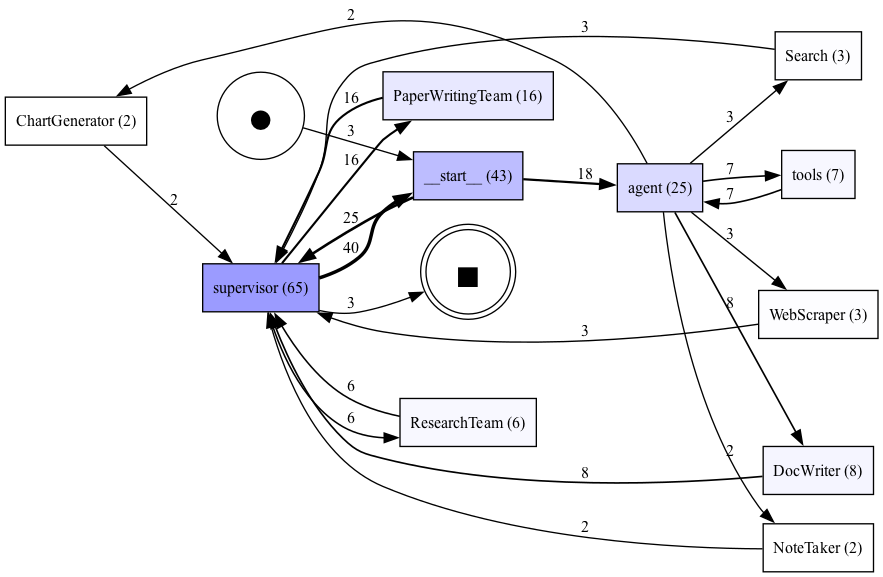

In [42]:
# Discover the Directly-Follows Graph (DFG)
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)

# Visualize the Directly-Follows Graph (DFG)
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

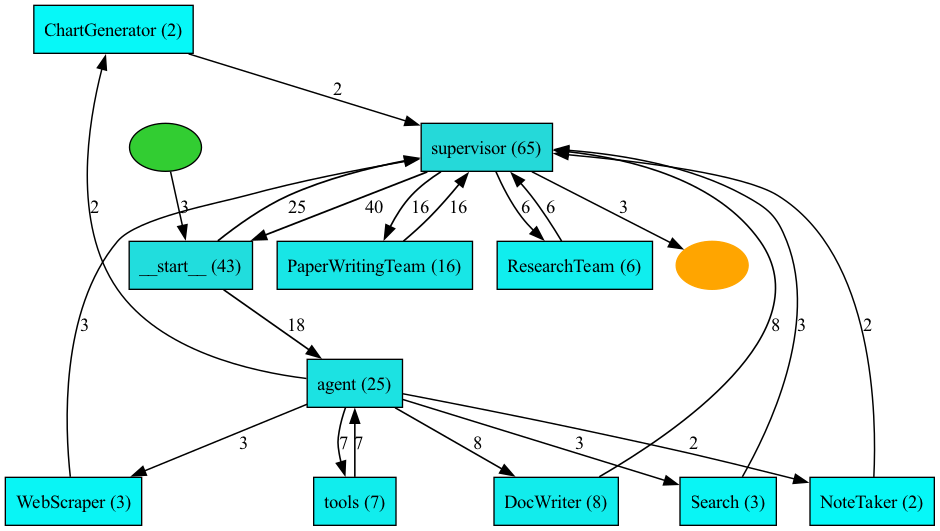

In [44]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

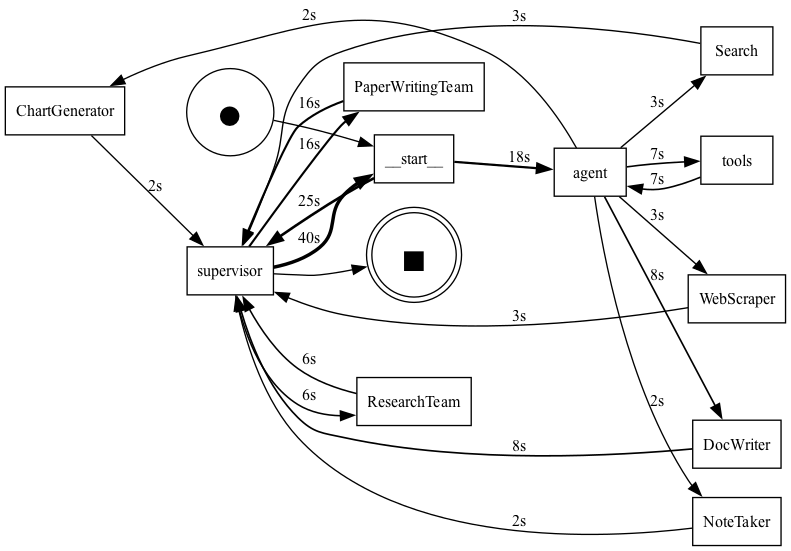

In [48]:
pm4py.view_performance_dfg(dfg, start_activities, end_activities)

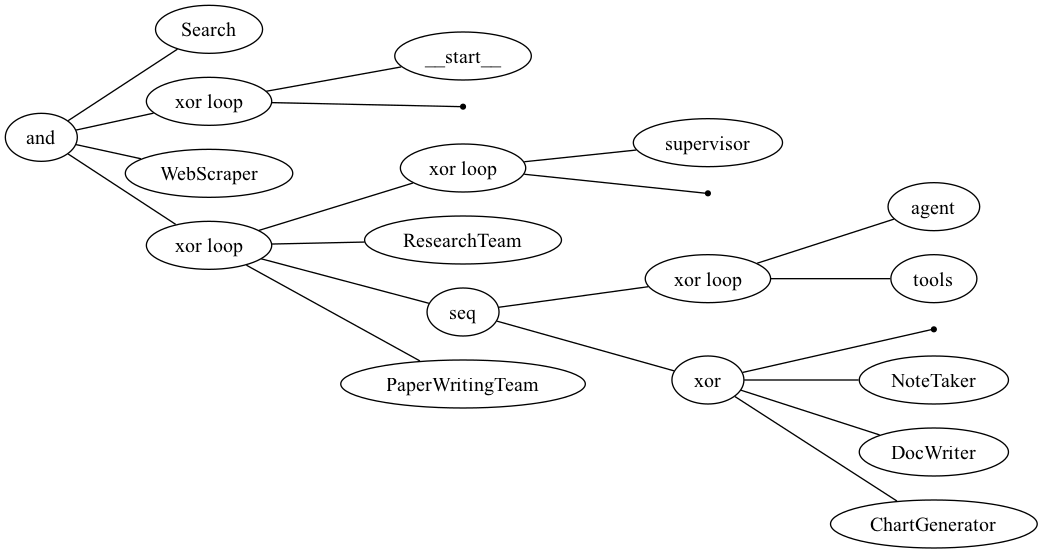

In [50]:
process_tree = pm4py.discover_process_tree_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree)

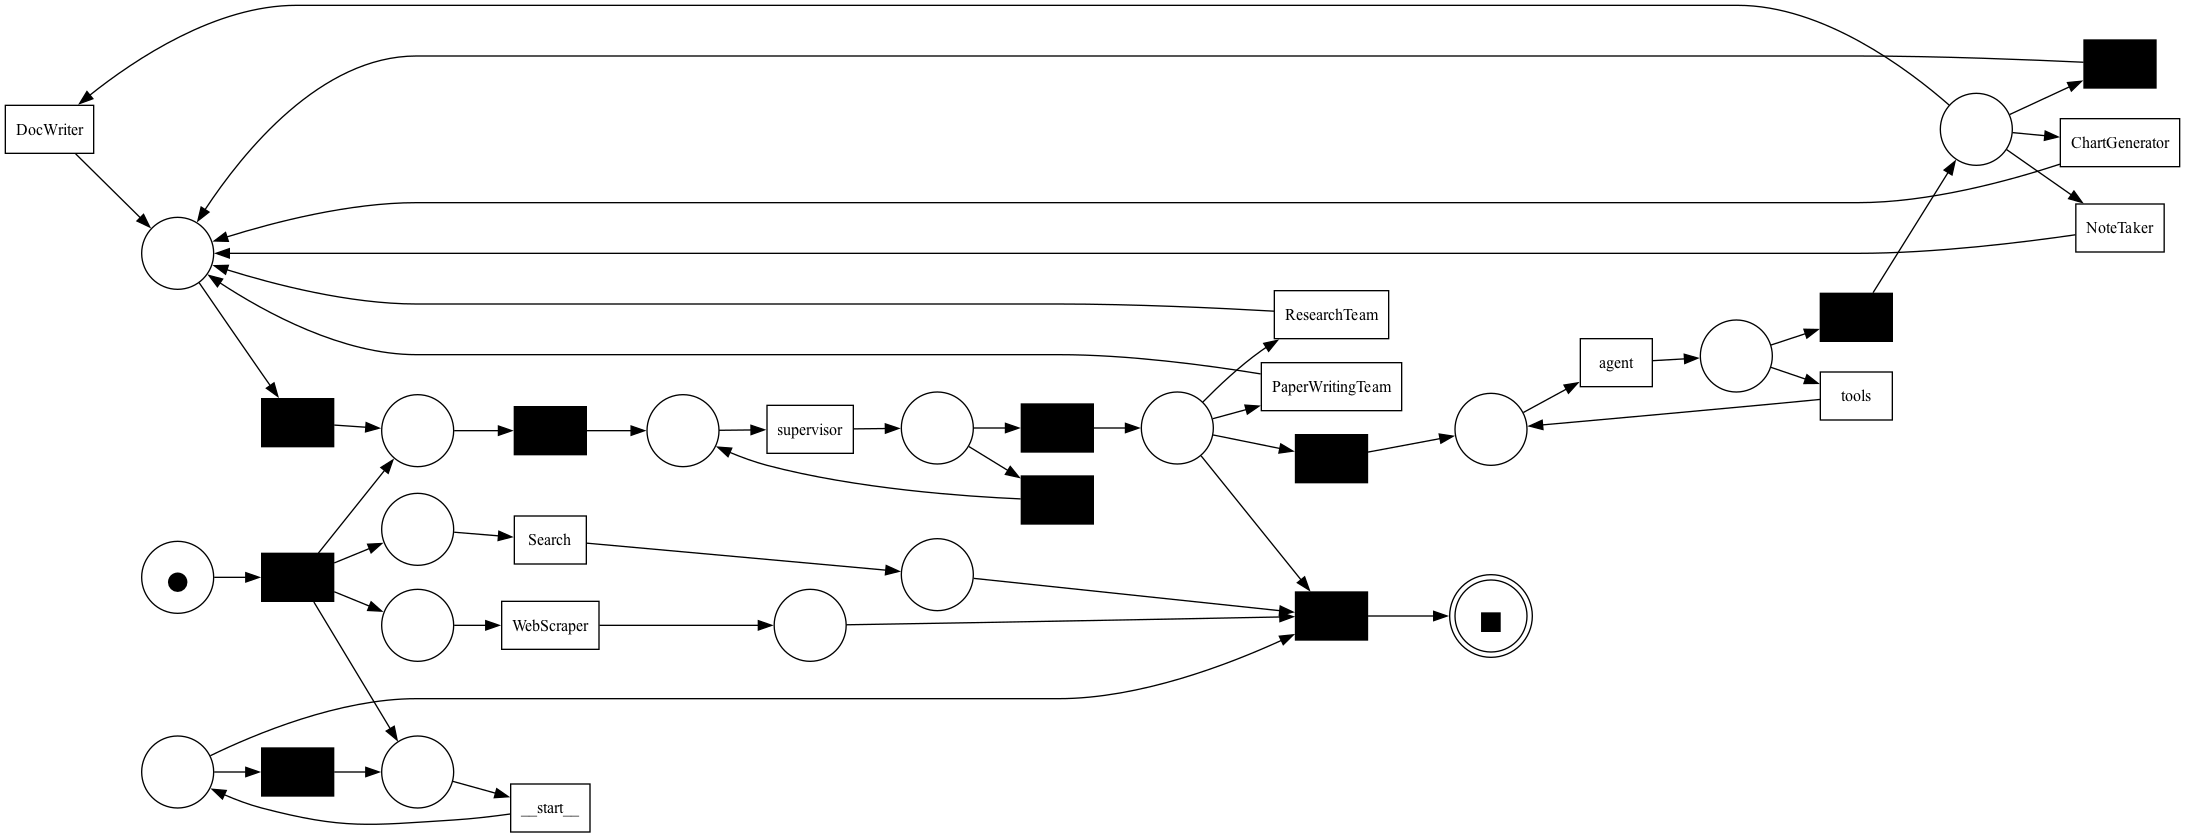

In [62]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm)

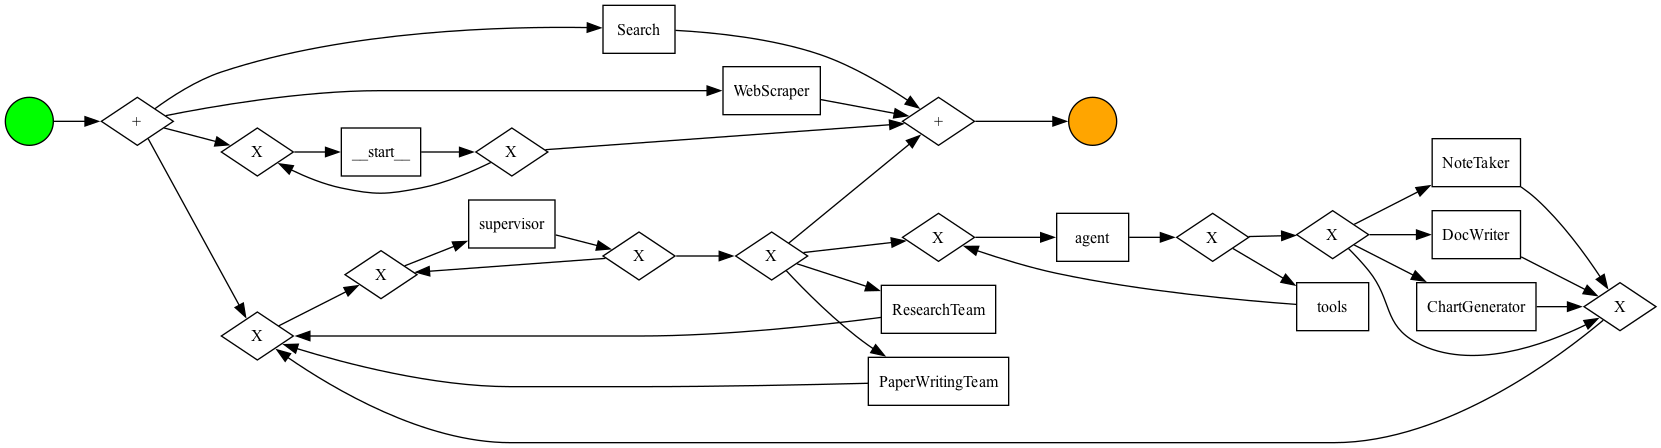

In [56]:
bpmn_graph = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(bpmn_graph)

In [65]:
# Generuje plik html
metric = pm4py.discover_subcontracting_network(event_log)
pm4py.view_sna(metric)

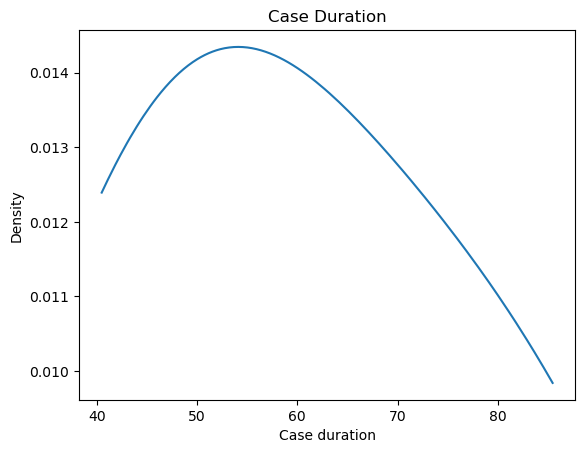

In [66]:
pm4py.view_case_duration_graph(event_log)

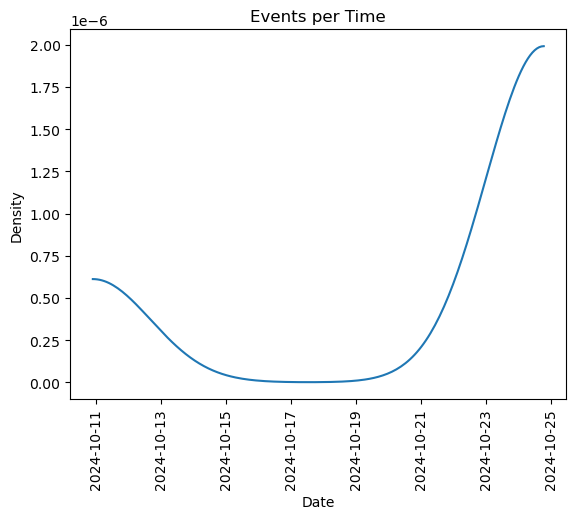

In [67]:
pm4py.view_events_per_time_graph(event_log)

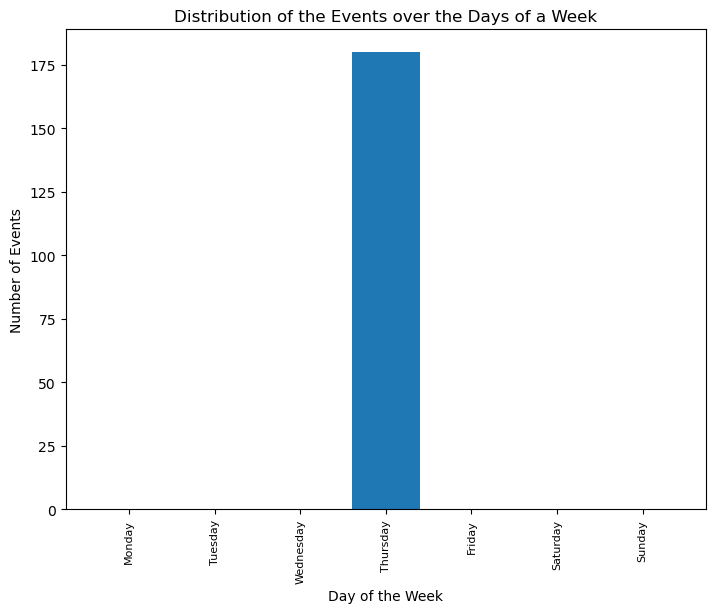

In [68]:
pm4py.view_events_distribution_graph(event_log)

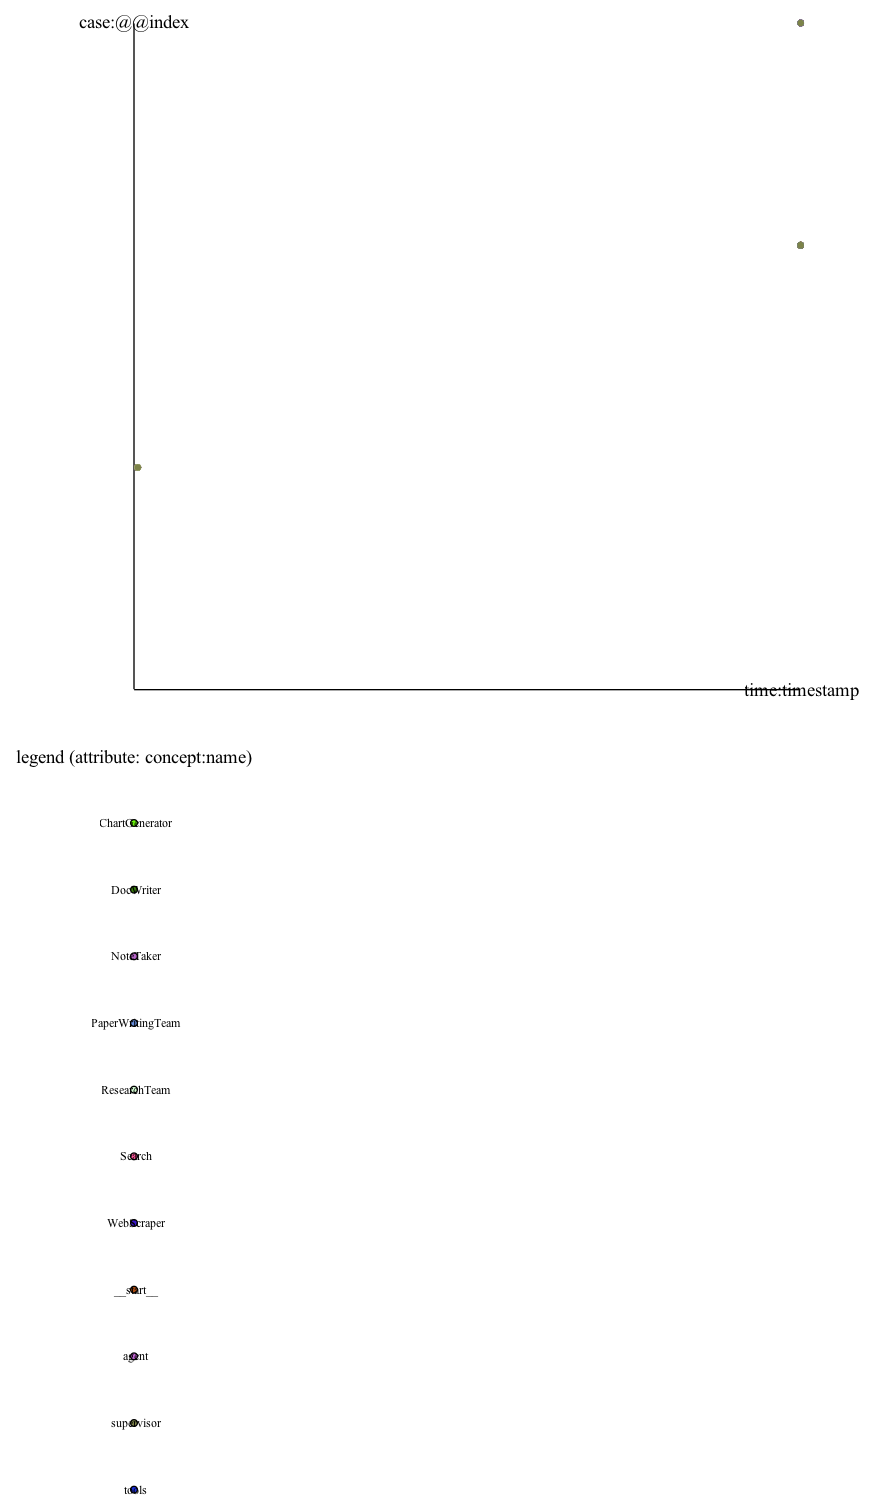

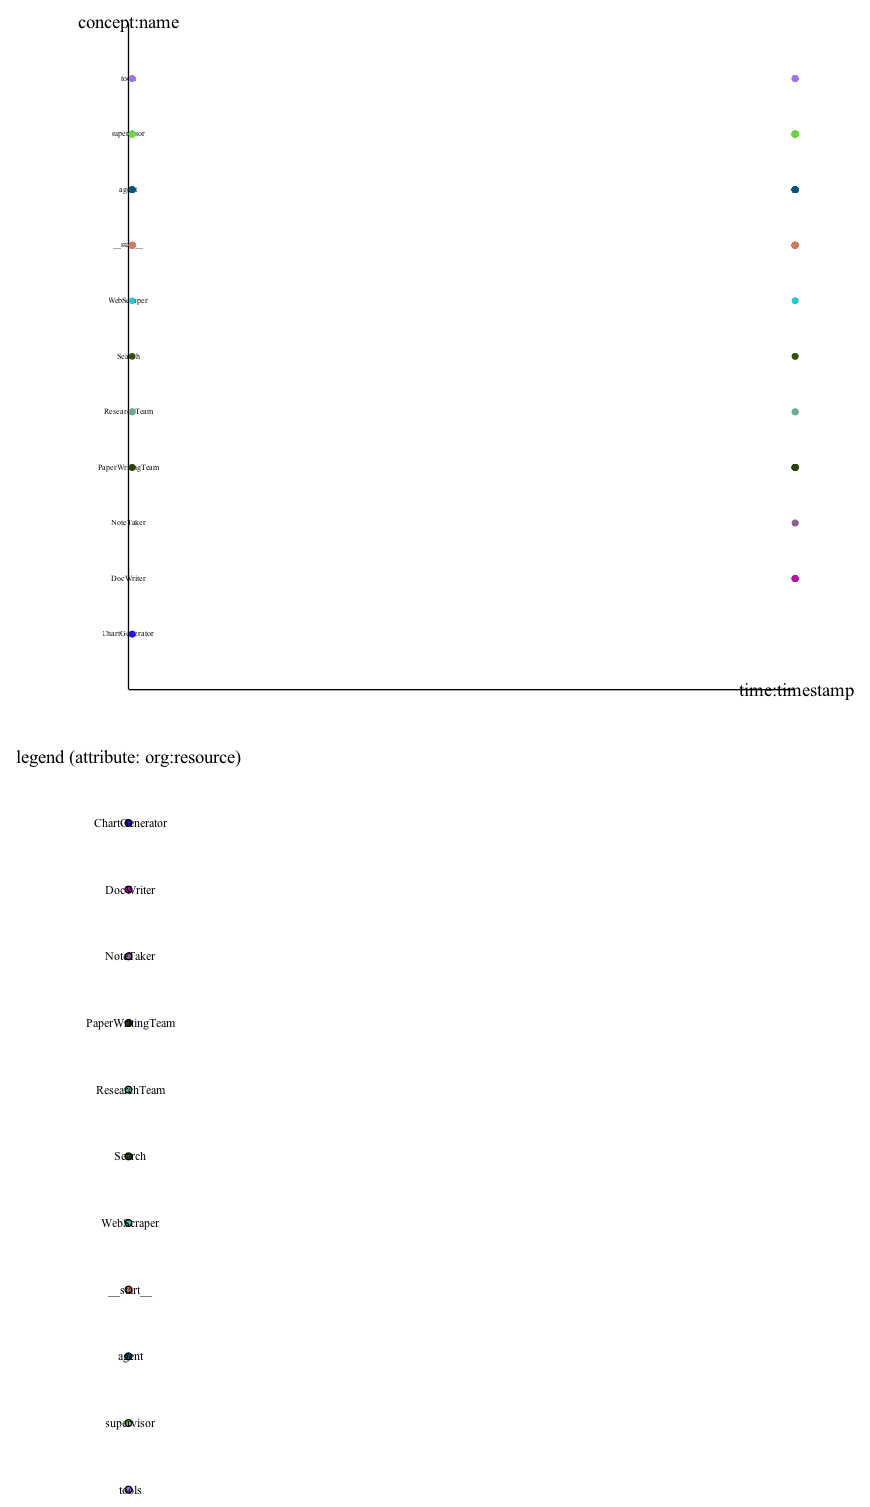

In [61]:
pm4py.view_dotted_chart(event_log, format='png')
pm4py.view_dotted_chart(event_log, attributes=['time:timestamp', 'concept:name', 'org:resource'])

/Users/tomek/opt/anaconda3/envs/LangGraph-Parser-PoC-3-11/lib/python3.11/site-packages/pm4py/algo/discovery/performance_spectrum/variants/dataframe.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[activity_key] = dataframe[activity_key].astype("string")


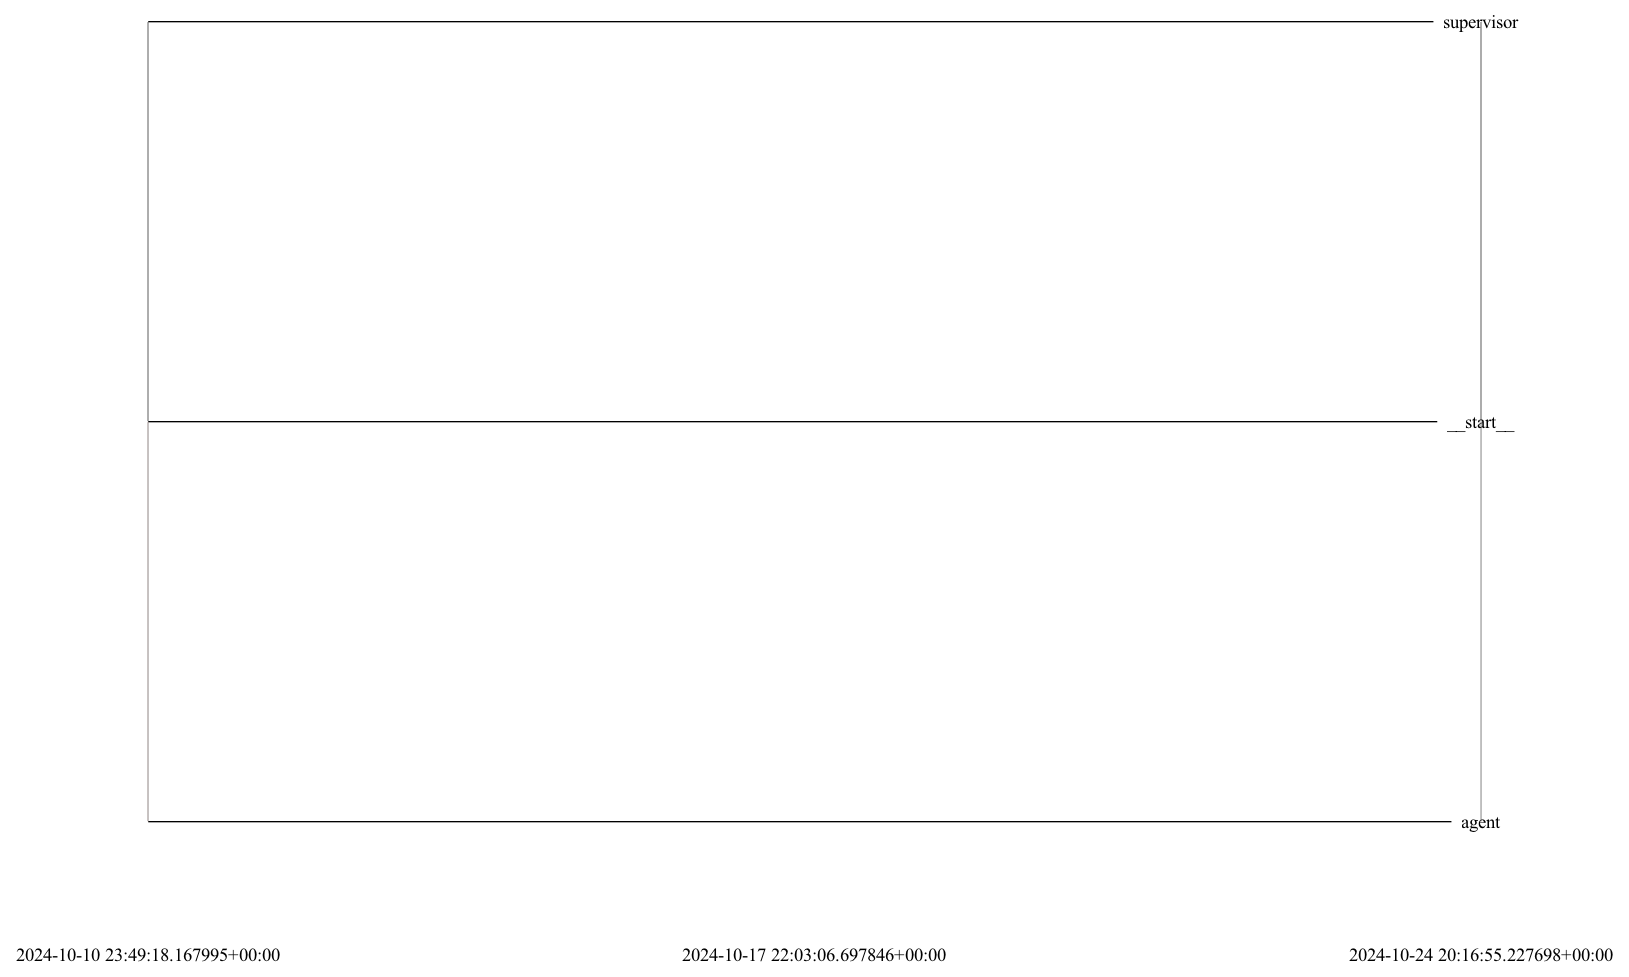

In [57]:
# COS TU CHYBA NIE DZIALA...
pm4py.view_performance_spectrum(event_log, ['supervisor', '__start__', 'agent'])

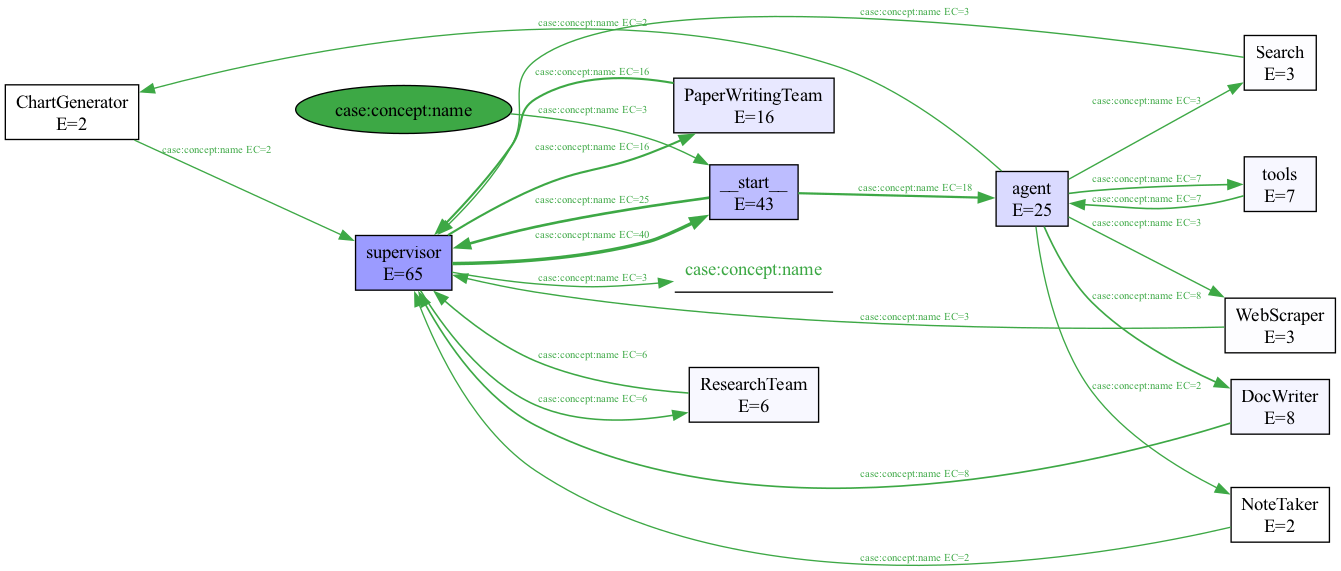

In [69]:
ocdfg = pm4py.discover_ocdfg(ocel)
pm4py.view_ocdfg(ocdfg,annotation='frequency')

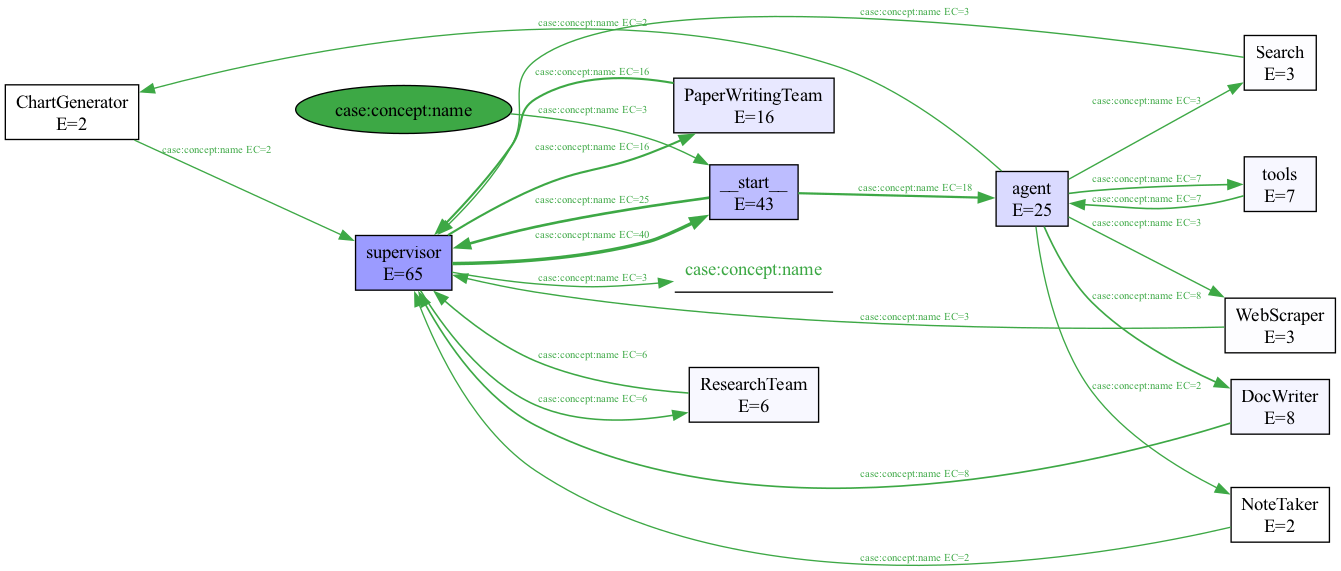

In [70]:
ocpn = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocdfg(ocpn)

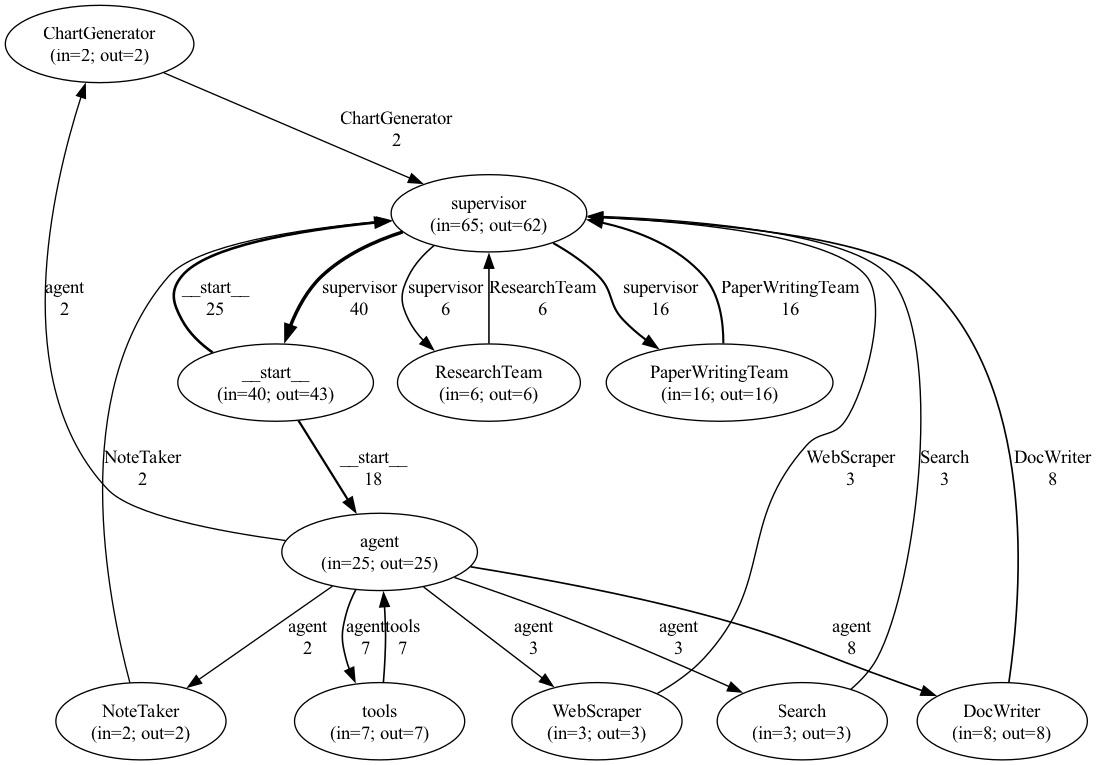

In [71]:
net_ana = pm4py.discover_network_analysis(event_log, out_column='case:concept:name', in_column='case:concept:name', node_column_source='org:resource', node_column_target='org:resource', edge_column='concept:name')
pm4py.view_network_analysis(net_ana)

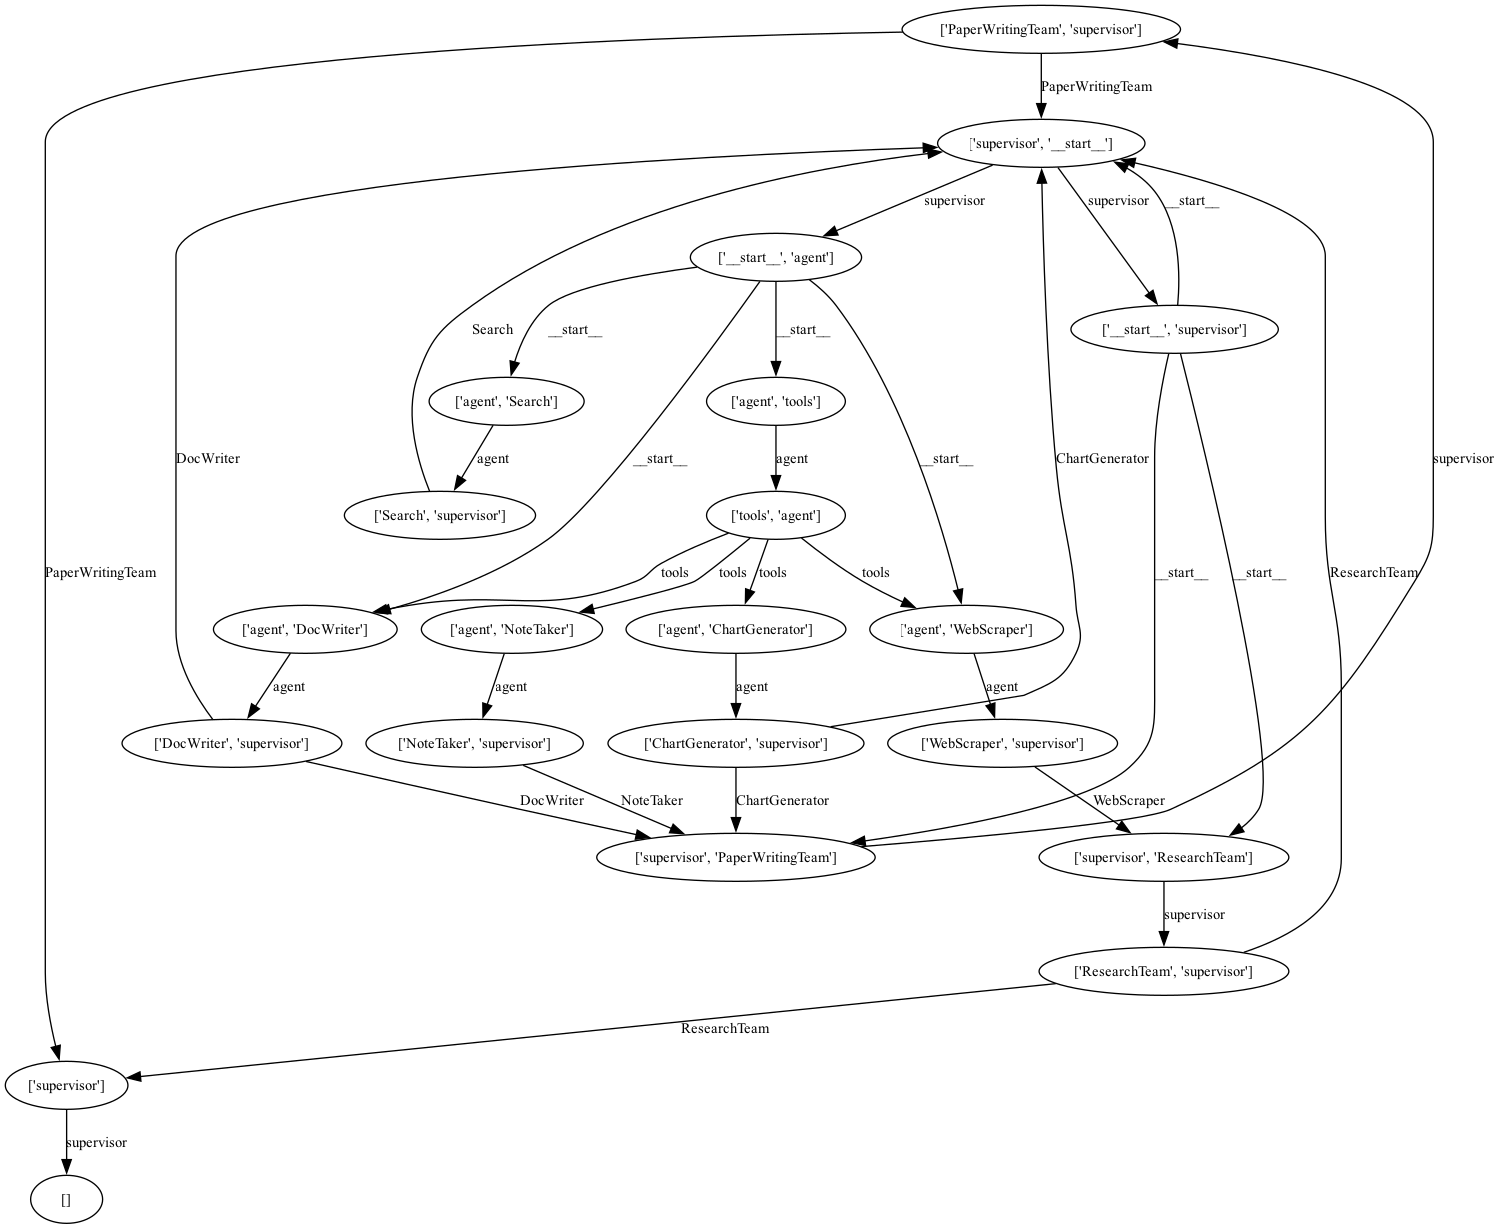

In [74]:
transition_system = pm4py.discover_transition_system(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)

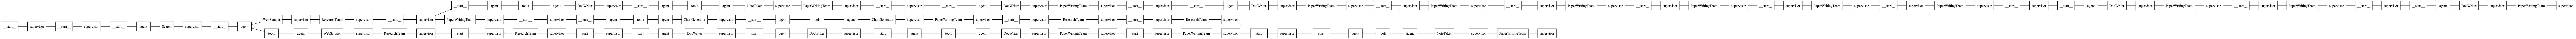

In [75]:
prefix_tree = pm4py.discover_prefix_tree(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_prefix_tree(prefix_tree)

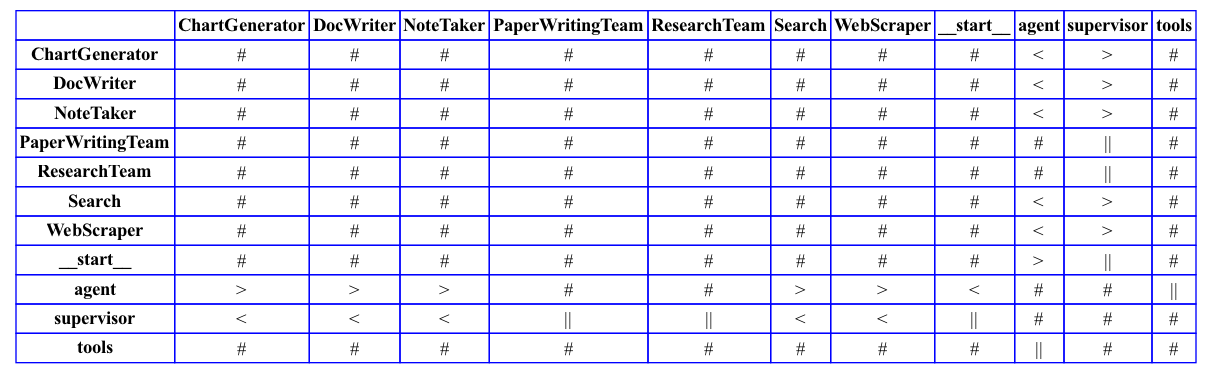

In [77]:
fp_log = pm4py.discover_footprints(event_log)
pm4py.view_footprints(fp_log)

In [81]:
obj_graph = pm4py.discover_objects_graph(ocel, graph_type='object_interaction')
pm4py.view_object_graph(ocel, obj_graph)